In [2]:
### importing liberary 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib

In [3]:
data =pd.read_csv('D:/Lecture file/25 th lecture 29 march/4. Logistic Regresssion/bank-full up.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Exploratory Data Analysi done on bank data

In [9]:
categories_data = data.select_dtypes(include ='object')
categories_data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [11]:
le = LabelEncoder()
categories_data_encode = categories_data .copy()

for col in categories_data :
    categories_data_encode[col] =le.fit_transform(categories_data_encode[col])

In [13]:
num_data = data.select_dtypes(include ='int64')
num_data

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [15]:
data_sort =pd.concat([categories_data_encode ,num_data ], axis =1)
data_sort

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,4,1,2,0,1,0,2,8,3,0,58,2143,5,261,1,-1,0
1,9,2,1,0,1,0,2,8,3,0,44,29,5,151,1,-1,0
2,2,1,1,0,1,1,2,8,3,0,33,2,5,76,1,-1,0
3,1,1,3,0,1,0,2,8,3,0,47,1506,5,92,1,-1,0
4,11,2,3,0,0,0,2,8,3,0,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,9,3,1,51,825,17,977,3,-1,0
45207,5,0,0,0,0,0,0,9,3,1,71,1729,17,456,2,-1,0
45208,5,1,1,0,0,0,0,9,2,1,72,5715,17,1127,5,184,3
45209,1,1,1,0,0,0,1,9,3,0,57,668,17,508,4,-1,0


In [17]:
data_sort.isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
y            0
age          0
balance      0
day          0
duration     0
campaign     0
pdays        0
previous     0
dtype: int64

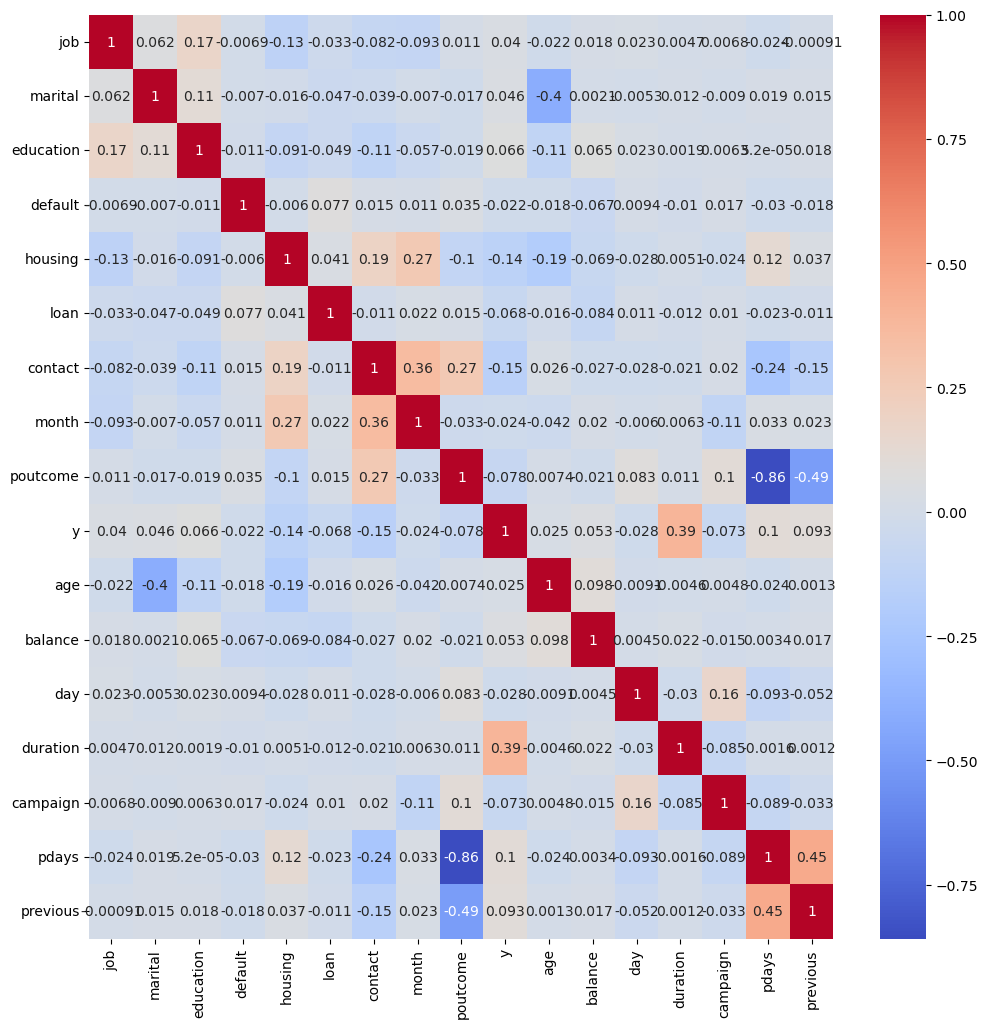

In [19]:
## correlation map
plt.figure(figsize=(12,12))
sns.heatmap(data_sort.corr(), annot=True, cmap='coolwarm')
plt.savefig('D:/coreelation_lr.png')

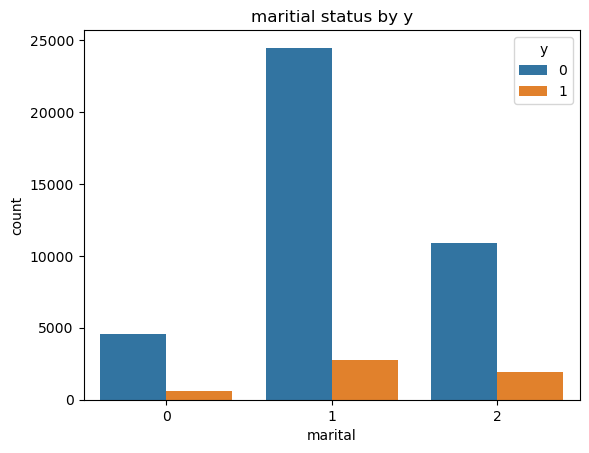

In [21]:
## bar chart
sns.countplot(x='marital', hue='y', data=data_sort)
plt.title("maritial status by y")
plt.savefig('D:/bank_data_lr.png')

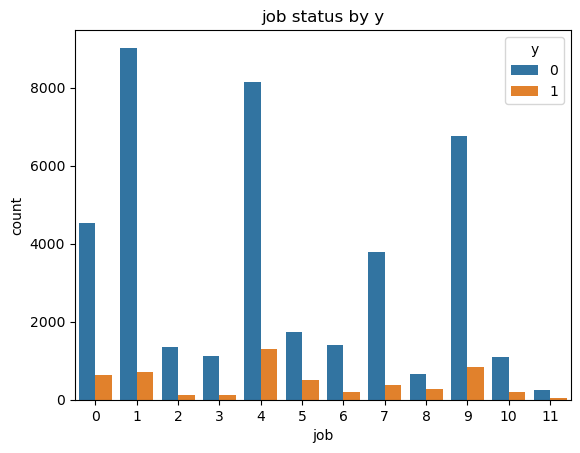

In [23]:
sns.countplot(x='job', hue='y', data=data_sort)
plt.title("job status by y")
plt.savefig('D:/job .png')

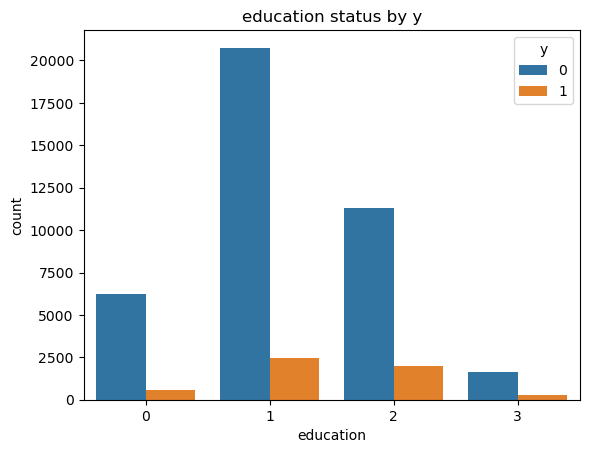

In [25]:
sns.countplot(x='education', hue='y', data=data_sort)
plt.title("education status by y")
plt.savefig('D:/education .png')

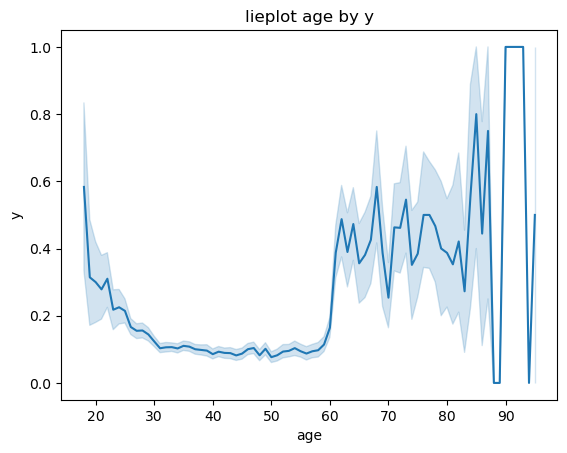

In [29]:
## lineplot
sns.lineplot(x ='age', y ='y',data=data_sort)
plt.title("lieplot age by y")
plt.savefig('D:/age .png')